**Table of contents**<a id='toc0_'></a>    
1. [Python GIL(全局解释器锁 Global Interpreter Lock)](#toc1_)    
1.1. [一个不解之谜](#toc1_1_)    
1.2. [为什么有GIL？](#toc1_2_)    
1.3. [GIL是如何工作的？](#toc1_3_)    
1.4. [python的线程安全](#toc1_4_)    
1.5. [如何绕过GIL?](#toc1_5_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=true
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>[Python GIL(全局解释器锁 Global Interpreter Lock)](#toc0_)
---
## 1.1. <a id='toc1_1_'></a>[一个不解之谜](#toc0_)

多线程执行没有提升效率？

In [9]:
# 简单的cpu-bound代码
def CountDown(n):
    while n > 0:
        n -= 1

CountDown(100000000)

In [8]:
from threading import Thread

def CountDown(n):
    while n > 0:
        n -= 1

n=100000000
t1=Thread(target=CountDown, args=(n//2,))
t2=Thread(target=CountDown, args=(n//2,))
t1.start()
t2.start()
t1.join()
t2.join()

## 1.2. <a id='toc1_2_'></a>[为什么有GIL？](#toc0_)
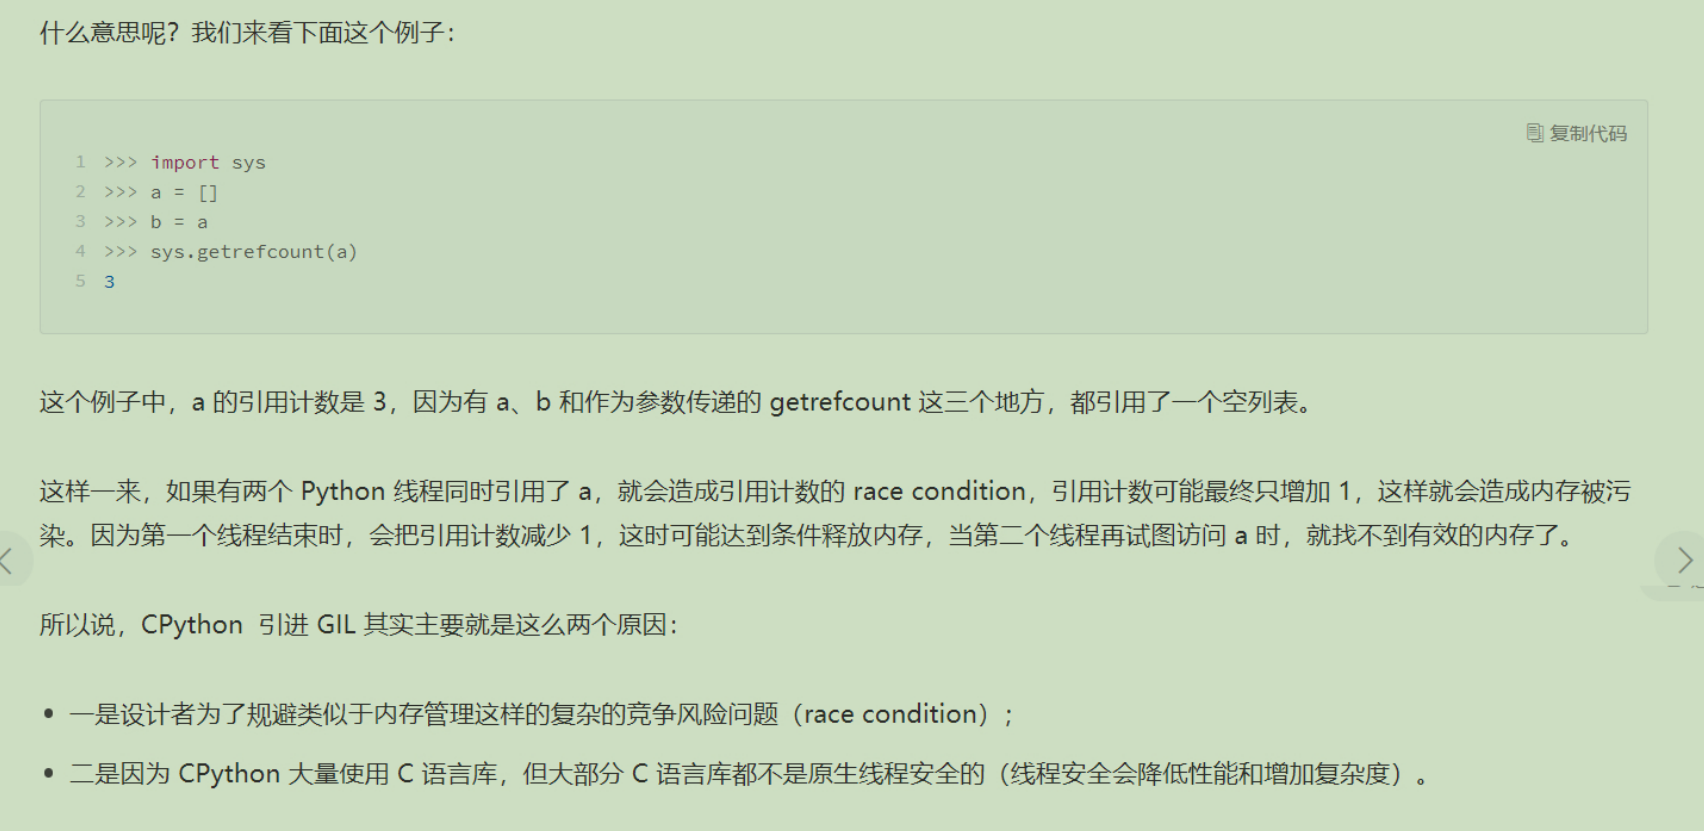


## 1.3. <a id='toc1_3_'></a>[GIL是如何工作的？](#toc0_)
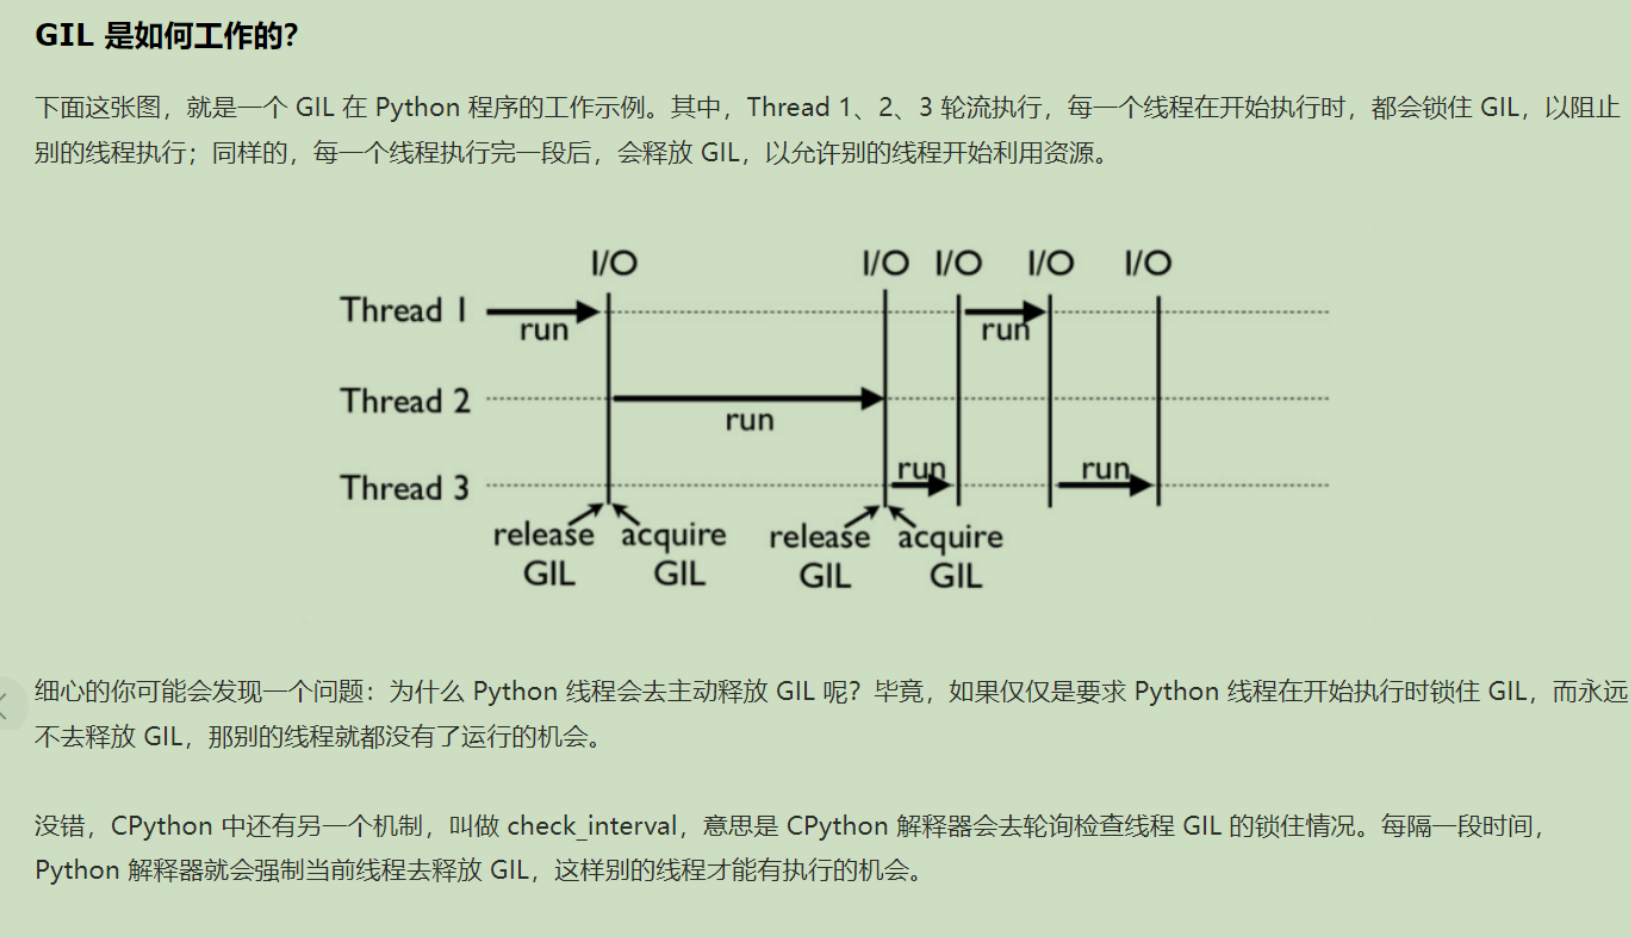


## 1.4. <a id='toc1_4_'></a>[python的线程安全](#toc0_)



In [67]:
import threading
n=0

def foo():
    global n 
    n+=1 #! 不安全

threads=[]
for _ in range(100):
    t=threading.Thread(target=foo)
    threads.append(t)
    t.start()

for t in threads:
    t.join()

print(n)

100


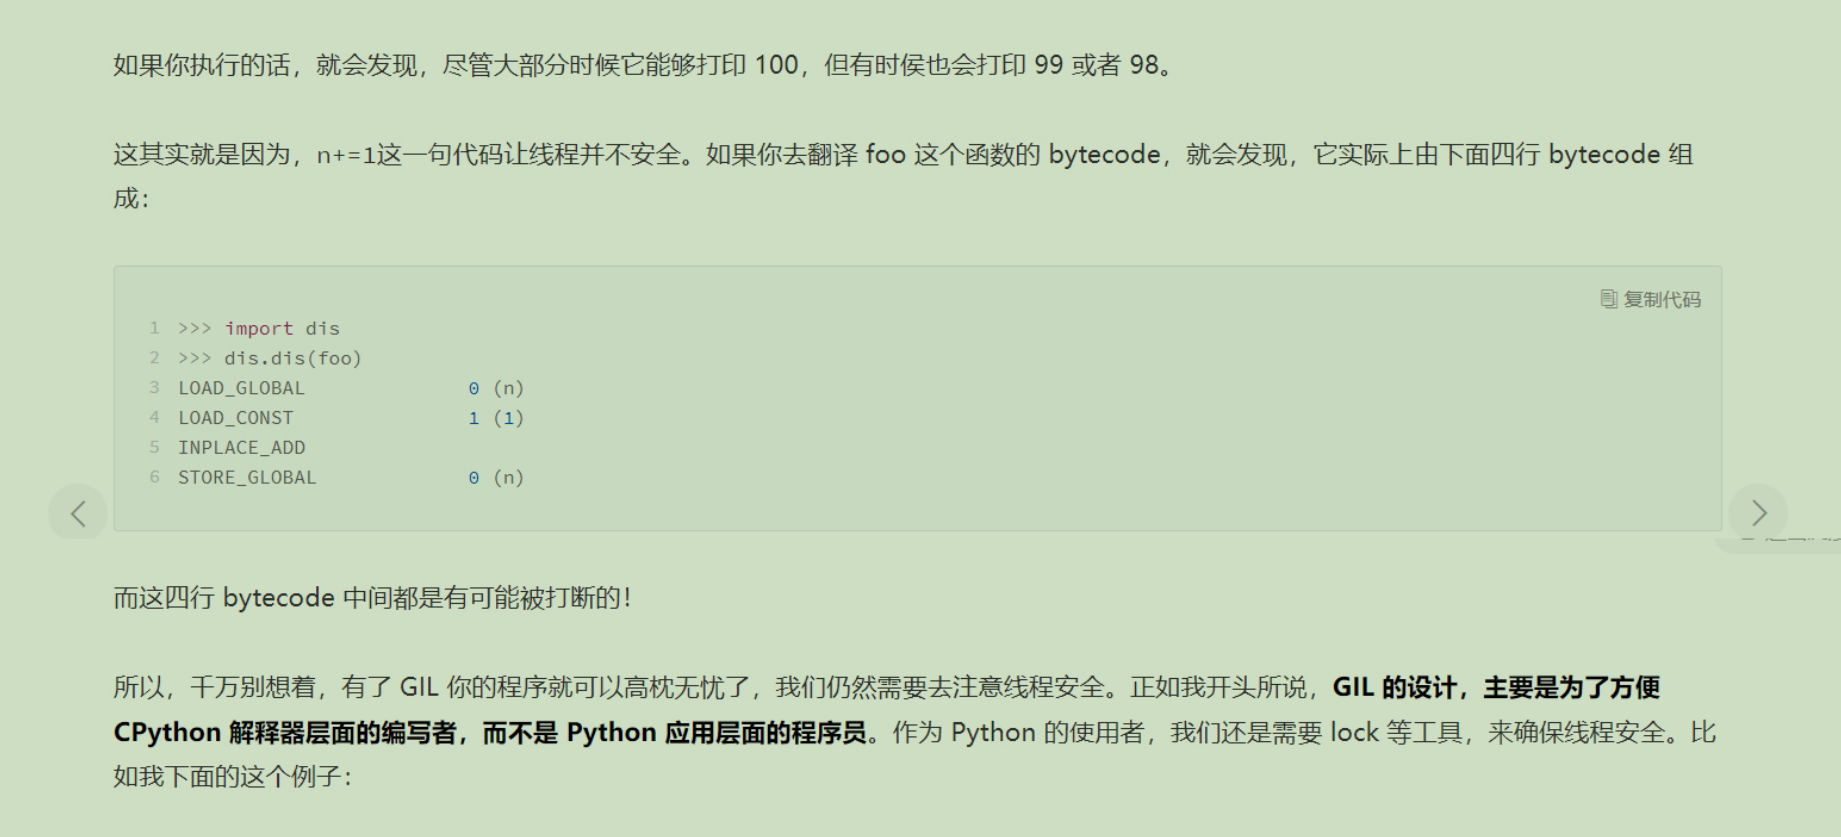

In [69]:
import threading
n=0
lock=threading.Lock()

def foo():
    global n 
    with lock:
        n+=1 

threads=[]
for _ in range(100):
    t=threading.Thread(target=foo)
    threads.append(t)
    t.start()

for t in threads:
    t.join()

print(n)

100


## 1.5. <a id='toc1_5_'></a>[如何绕过GIL?](#toc0_)
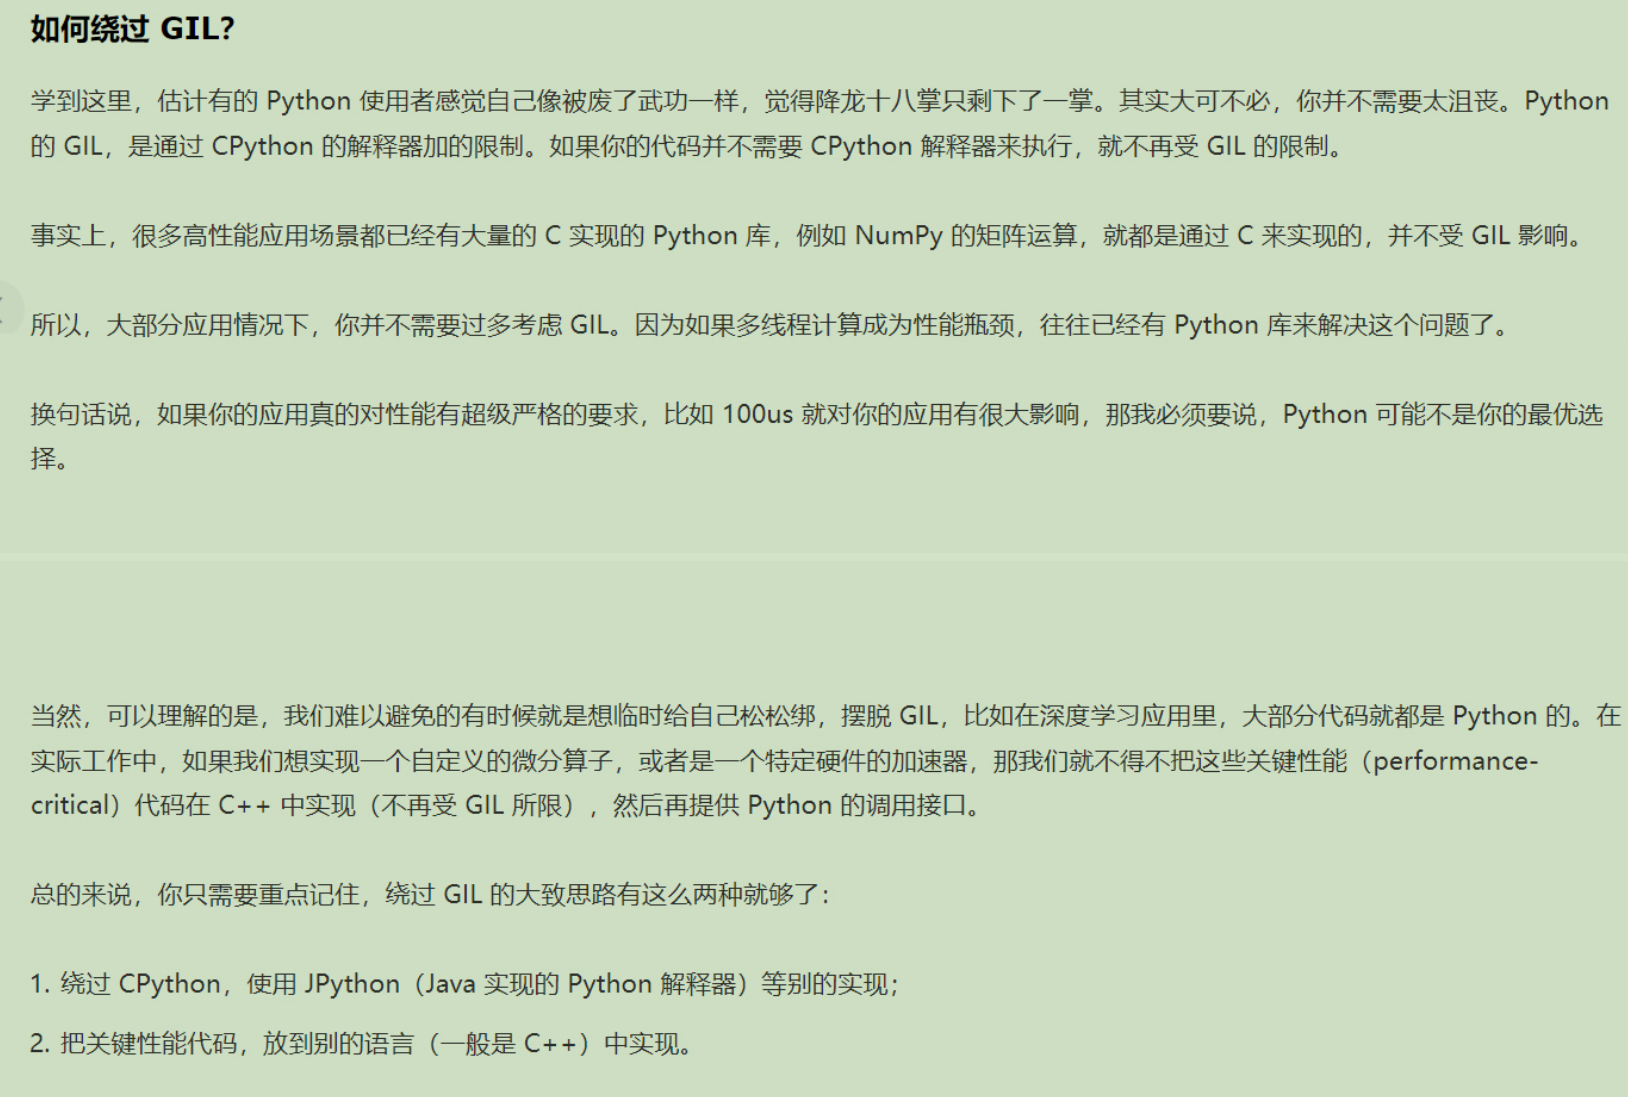